In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

# 很重要
幫我確定你是不是用GPU在跑

In [2]:
# 請用各種手段把檔案讀進來
#quick draw website: https://quickdraw.withgoogle.com/
#numpy_bitmap dataset of quick draw: https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?prefix=&forceOnObjectsSortingFiltering=false
pure_data_cat = np.load('/content/drive/MyDrive/第五屆MITC社團/社課講義/下學期/20220503_draw_and_guess/full_numpy_bitmap_cat.npy')
pure_data_crocodile = np.load('/content/drive/MyDrive/第五屆MITC社團/社課講義/下學期/20220503_draw_and_guess/full_numpy_bitmap_crocodile.npy')

In [3]:
pure_data_cat.shape #哥，你怎麼把我的28*28矩陣弄成784，不對欸

(123202, 784)

In [4]:
pure_data_crocodile.shape

(127932, 784)

In [5]:
data_cat = pure_data_cat.reshape((123202, 28, 28))
data_crocodile = pure_data_crocodile.reshape((127932, 28, 28))

In [6]:
data_cat.shape #好欸28*28

(123202, 28, 28)

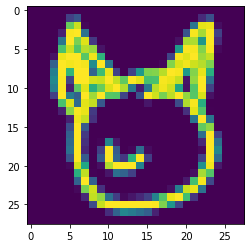

In [7]:
plt.imshow(data_cat[87]) #我們來看看大家畫的貓貓

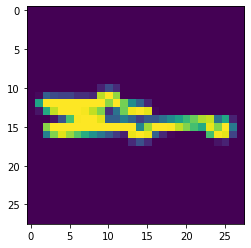

In [8]:
plt.imshow(data_crocodile[87]) #還有鱷魚

In [9]:
#資料太多會訓練到天荒地老
train_cat = data_cat[:2000]
train_crocodile = data_crocodile[:2000]
#btw，你如果閒著沒事可以試試看貓貓的圖放鱷魚的兩倍，你就會發現大部分的鱷魚都是沼澤貓貓

In [10]:
model = Sequential()
for i in range(3):
    model.add(Conv2D(128, (3,3), padding='same',
                    input_shape=(28,28,1),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [13]:
from sklearn.utils import shuffle

In [14]:
x = np.concatenate((train_cat, train_crocodile), axis=0)
x.shape

(4000, 28, 28)

In [15]:
x = x.reshape(4000, 28, 28, 1)

In [16]:
y = to_categorical([0]*2000+[1]*2000,2)
y.shape

(4000, 2)

In [17]:
x, y = shuffle(x, y)

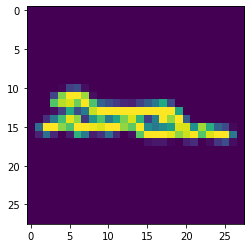

In [18]:
plt.imshow(x[0].reshape(28,28))

In [19]:
y[0]

array([0., 1.], dtype=float32)

In [20]:
model.fit(x, y, batch_size=300, epochs=30)

Epoch 1/30
14/14 [==============================] - 12s 37ms/step - loss: 9.6742 - accuracy: 0.7243
Epoch 2/30
14/14 [==============================] - 0s 22ms/step - loss: 0.4965 - accuracy: 0.8627
Epoch 3/30
14/14 [==============================] - 0s 22ms/step - loss: 0.2688 - accuracy: 0.8895
Epoch 4/30
14/14 [==============================] - 0s 22ms/step - loss: 0.2072 - accuracy: 0.9143
Epoch 5/30
14/14 [==============================] - 0s 22ms/step - loss: 0.1693 - accuracy: 0.9367
Epoch 6/30
14/14 [==============================] - 0s 22ms/step - loss: 0.1513 - accuracy: 0.9430
Epoch 7/30
14/14 [==============================] - 0s 22ms/step - loss: 0.1276 - accuracy: 0.9530
Epoch 8/30
14/14 [==============================] - 0s 22ms/step - loss: 0.1089 - accuracy: 0.9625
Epoch 9/30
14/14 [==============================] - 0s 22ms/step - loss: 0.0961 - accuracy: 0.9665
Epoch 10/30
14/14 [==============================] - 0s 22ms/step - loss: 0.0899 - accuracy: 0.9682
Epoch 11

In [21]:
x_test = np.concatenate((data_cat[200:1200], data_crocodile[200:1200]), axis=0)
y_predict = np.argmax(model.predict(x_test), axis=-1)

In [22]:
from ipywidgets import interact_manual

In [23]:
def predict(img_idx):
    cate = {
        0:'貓貓',
        1:'鱷魚'
    }
    print('我知道了，這是'+cate[y_predict[img_idx]])
    plt.imshow(x_test[img_idx].reshape(28,28))

In [24]:
interact_manual(predict, img_idx=(0, len(x_test)))

interactive(children=(IntSlider(value=1000, description='img_idx', max=2000), Button(description='Run Interact…

<function __main__.predict(img_idx)>

In [25]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 5.2 MB/s 
     |████████████████████████████████| 2.3 MB 53.6 MB/s 
     |████████████████████████████████| 112 kB 73.4 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 212 kB 78.1 MB/s 
     |████████████████████████████████| 270 kB 67.0 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 80 kB 11.9 MB/s 
     |████████████████████████████████| 68 kB 8.6 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 856 kB 74.3 MB/s 
     |████████████████████████████████| 594 kB 76

In [26]:
import gradio as gr

In [27]:
def gradio_window(img):
    img = img.reshape((-1,28,28,1))
    pred = model.predict(img).flatten()
    cate = ['貓貓','鱷魚']
    return {cate[i]:float(pred[i]) for i in range(2)}

In [28]:
image = gr.inputs.Image(
    shape=(28,28),
    image_mode='L',
    source='canvas',
    label='請畫畫'
)
label = gr.outputs.Label(num_top_classes=2,label = '我知道了這是...')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

In [29]:
gr.Interface(fn=gradio_window,
             inputs=image,
             outputs=label,
             title = 'Mini Quick Draw',
             capture_session=True
             ).launch()

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://22278.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f5f74149ad0>,
 'http://127.0.0.1:7860/',
 'https://22278.gradio.app')